As a user, I want to know overall reating so that I can undertand current FIFA progress

# WorldMap interactive Plots - to understand overall rating based on Nationality

### This study is aimed to understand overall raiting based on nationality. We use "Folium" package to make wordmap. Since python identifis country either two digital or three digital codes. We need to convert contry to its three digital code first.  Please load "world-countries.json" file. 

###### Regarding converting to "continent", this will be twice conversion. We need to convert country to 2 digital code, then convert to continent using "country 2 digitial code" to continent code

### We are focus on the world map as follows:

### Overall rating based on nationality 

### Overall rating based on nationality (Position Group = Midfieder )

### Overall rating based on nationality (Position Group = Goal Keeper )

### Overall rating based on nationality (Position Group = Defender )

### Overall rating based on nationality (Position Group = Attacker )

In [104]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Start to do plots and analyze data

In [105]:
sample=pd.read_csv('FIFA_1112.csv', index_col=0)
df=sample

### Convert country to country code 

In [106]:
#convert country names which are recongized by python
df['Country'] = pd.np.where(df['Country'] == "Holland", "Netherlands", df['Country'])
df['Country'] = pd.np.where(df['Country'] == "England", "United Kingdom", df['Country'])

### import folium, and pycountry

In [107]:
#import modules for convert contry name to contry codes
import folium
import pycountry
df['Countryfullname'] = df['Country']
df['Countryfullname_cont'] = df['Country']
countries= df['Country'].unique().tolist()
print(countries)

['Argentina', 'Portugal', 'Brazil', 'Belgium', 'Slovenia', 'Germany', 'Egypt', 'Netherlands', 'Croatia', 'Italy', 'Spain', 'Uruguay', 'France', 'Poland', 'United Kingdom', 'Senegal', 'Denmark', 'Gabon', 'Korea Republic', 'Costa Rica', 'Bosnia and Herzegovina', 'Slovakia', 'Colombia', 'Austria', 'Scotland', 'Greece', 'Serbia', 'Morocco', 'Sweden', 'Wales', 'Hungary', 'Switzerland', 'Algeria', 'Chile', 'Czech Republic', "Côte d'Ivoire", 'Mexico', 'Norway', 'Iceland', 'Finland', 'Togo', 'Montenegro', 'Ukraine', 'Russia', 'Guinea', 'Jamaica', 'Cameroon', 'Congo DR', 'Ghana', 'Albania', 'Venezuela', 'Central African Republic', 'Israel', 'Nigeria', 'Armenia', 'Australia', 'Mali', 'Romania', 'Japan', 'Turkey', 'Paraguay', 'Northern Ireland', 'Cape Verde Islands', 'Tanzania', 'China PR', 'Kosovo', 'Republic of Ireland', 'Tunisia', 'United States', 'Dominican Republic', 'Burkina Faso', 'Syria', 'Peru', 'FYR Macedonia', 'Angola', 'South Africa', 'Ecuador', 'Kenya', 'New Zealand', 'Equatorial Gui

In [108]:
#convert country to country code to three digits
import pycountry

input_countries = df['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

In [109]:
#convert country to country code to two digits then continent
import pycountry
import pycountry_convert as pc
input_countries = df['Countryfullname_cont']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes_cont = [countries.get(country, 'Unknown code') for country in input_countries]

In [110]:
df['Country'] = codes
df.head(5)

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Shooting,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont
0,Lionel Messi,FC Barcelona,ARG,SA,LaLiga Santander,94,RW,Attacker,4,4,...,92,92,96,39,66,170,472,2297,Argentina,Argentina
1,Cristiano Ronaldo,Piemonte Calcio,PRT,EU,Serie A TIM,93,ST,Attacker,5,4,...,93,82,89,35,78,187,467,2265,Portugal,Portugal
2,Neymar Jr,Paris Saint-Germain,BRA,SA,Ligue 1 Conforama,92,LW,Attacker,5,5,...,85,87,95,32,58,175,448,2197,Brazil,Brazil
3,Kevin De Bruyne,Manchester City,BEL,EU,Premier League,91,CAM,Midfieder,4,5,...,86,92,87,61,78,181,480,2311,Belgium,Belgium
4,Eden Hazard,Real Madrid,BEL,EU,LaLiga Santander,91,LW,Attacker,4,4,...,83,86,94,35,66,175,455,2191,Belgium,Belgium


In [111]:
import pycountry_convert as pc
df['Countryfullname_cont1'] = codes_cont
df.head(5)

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
0,Lionel Messi,FC Barcelona,ARG,SA,LaLiga Santander,94,RW,Attacker,4,4,...,92,96,39,66,170,472,2297,Argentina,Argentina,AR
1,Cristiano Ronaldo,Piemonte Calcio,PRT,EU,Serie A TIM,93,ST,Attacker,5,4,...,82,89,35,78,187,467,2265,Portugal,Portugal,PT
2,Neymar Jr,Paris Saint-Germain,BRA,SA,Ligue 1 Conforama,92,LW,Attacker,5,5,...,87,95,32,58,175,448,2197,Brazil,Brazil,BR
3,Kevin De Bruyne,Manchester City,BEL,EU,Premier League,91,CAM,Midfieder,4,5,...,92,87,61,78,181,480,2311,Belgium,Belgium,BE
4,Eden Hazard,Real Madrid,BEL,EU,LaLiga Santander,91,LW,Attacker,4,4,...,86,94,35,66,175,455,2191,Belgium,Belgium,BE


In [112]:
df.drop(df.loc[df['Countryfullname_cont1']=='Unknown code'].index, inplace=True)

In [113]:
#Convery contry code to continent
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
cont1s=df['Countryfullname_cont1'].tolist()
change_cont1s = []
for cont1 in cont1s:
    continent_name = country_alpha2_to_continent_code(cont1)
    change_cont1s.append(continent_name)
df['Countryfullname_cont']=change_cont1s
df.tail(10)

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
16730,Tobias Klysner,Randers FC,DNK,EU,Superliga,48,LW,Attacker,2,3,...,40,52,22,49,170,274,1289,Denmark,EU,DK
16732,Asim Aksungur,Yukatel Denizlispor,TUR,AS,Süper Lig,48,CM,Midfieder,2,3,...,47,47,46,51,175,282,1335,Turkey,AS,TR
16733,Nathan Morley,Burton Albion,GBR,EU,EFL League One,48,CB,Defender,2,2,...,26,31,49,52,178,235,1120,United Kingdom,EU,GB
16736,Francisco Nevarez,FC Juárez,MEX,NaN,LIGA Bancomer MX,48,RB,Defender,2,2,...,29,47,47,50,178,255,1199,Mexico,NA,MX
16738,Vegard Storsve,Lillestrøm SK,NOR,EU,Eliteserien,48,GK,Goal Keeper,1,2,...,48,51,30,49,185,278,538,Norway,EU,NO
16743,Robin Wikberg,Östersunds FK,SWE,EU,Allsvenskan,48,CB,Defender,2,2,...,31,33,47,49,186,240,1124,Sweden,EU,SE
16745,Connor Heath,Crewe Alexandra,GBR,EU,EFL League Two,48,CM,Midfieder,2,3,...,45,48,40,64,188,310,1436,United Kingdom,EU,GB
16746,Charlie Pattison,Milton Keynes Dons,GBR,EU,EFL League One,48,CM,Midfieder,2,3,...,44,50,40,50,185,293,1345,United Kingdom,EU,GB
16747,Mohammed Sagaf,Carlisle United,GBR,EU,EFL League Two,48,CM,Midfieder,2,3,...,47,44,38,53,177,279,1327,United Kingdom,EU,GB
16748,Hector Kyprianou,Leyton Orient,CYP,AS,EFL League Two,48,CM,Midfieder,2,3,...,47,44,42,51,182,288,1329,Cyprus,AS,CY


In [114]:
# >>> import seaborn as sns
# >>> sns.set(style="whitegrid")
# >>> tips = sns.load_dataset("tips")
# >>> ax = sns.barplot(x="day", y="total_bill", data=tips)

### Overall rating based on continent

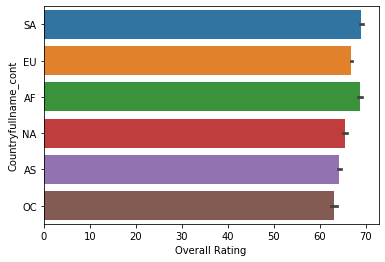

In [115]:
import seaborn as sns
ax = sns.barplot(x="Overall Rating", y="Countryfullname_cont", data=sample)

### The counts of each continent- EU is the majority

continents, NA = "North America", SA = "South Amierica", AS = "Asia", OC = "Australia", AF = "Africa"

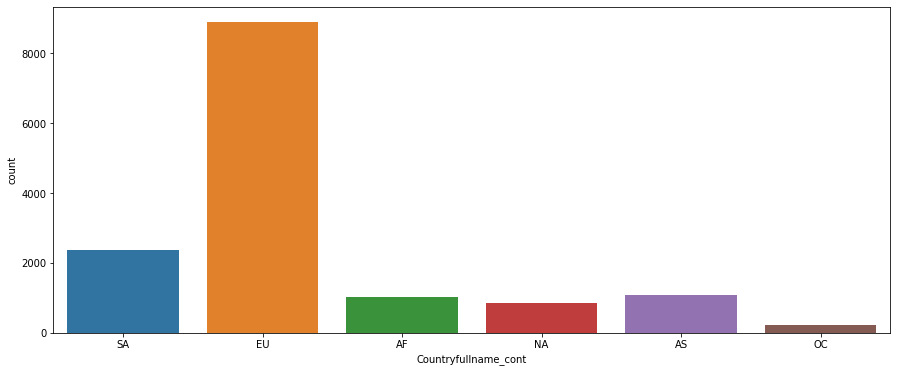

In [116]:
# Sort players based on their countries
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot(x="Countryfullname_cont", data=sample)

In [117]:
df2=df.head(100)
df.describe()

,Overall Rating,Skill,Weak Foot,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Height,Base Stats
count,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000,14494.000000
mean,66.965365,2.400580,2.956189,67.740444,54.105147,58.451428,63.662895,50.663171,65.405271,181.421347,360.027874
std,6.802710,0.780119,0.664586,11.203264,13.916855,10.085494,9.776142,16.495379,9.476272,6.856746,40.010192
min,48.000000,1.000000,1.000000,24.000000,15.000000,24.000000,24.000000,15.000000,31.000000,155.000000,207.000000
25%,63.000000,2.000000,3.000000,62.000000,44.000000,52.000000,58.000000,36.000000,60.000000,177.000000,333.000000
50%,67.000000,2.000000,3.000000,68.000000,57.000000,59.000000,65.000000,54.000000,66.000000,182.000000,361.000000
75%,71.000000,3.000000,3.000000,75.000000,65.000000,65.000000,70.000000,64.000000,72.000000,186.000000,388.000000
max,94.000000,5.000000,5.000000,96.000000,93.000000,93.000000,96.000000,90.000000,91.000000,203.000000,499.000000


### Continent count : EU> SA>AS>AF>NA>OC

In [118]:
#As a user, I want to know players from which continents
df.groupby('Countryfullname_cont')['Name'].count()

Countryfullname_cont
AF    1026
AS    1097
EU    8886
NA     869
OC     234
SA    2382
Name: Name, dtype: int64

### The count of each country

In [119]:
df.groupby('Countryfullname')['Name'].count()

Countryfullname
Afghanistan              2
Albania                 39
Algeria                 46
Angola                  15
Antigua and Barbuda      6
                      ... 
United States          337
Uruguay                125
Uzbekistan               3
Zambia                  11
Zimbabwe                11
Name: Name, Length: 134, dtype: int64

### Understand the players their nationality 

In [120]:
#As a user, I want to know player from which countries
#df.groupby('Countryfullname')['Name'].count()
df.groupby('Name', as_index=False).agg({"Countryfullname_cont": "sum"})

,Name,Countryfullname_cont
0,A.J. DeLaGarza,OC
1,AJ Leitch-Smith,EU
2,Aapo Halme,EU
3,Aaron Appindangoye,AF
4,Aaron Bastiaans,EU
...,...,...
14362,Žarko Udovičić,EU
14363,Ștefan Fara,EU
14364,Ștefan Rusu,EU
14365,Ștefan Târnovanu,EU


In [121]:
# grouped = df.groupby('Countryfullname_cont').agg("Overall Rating": [min, max, mean]) 
# # Using ravel, and a string join, we can create better names for the columns:
# grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
df.groupby('Countryfullname_cont', as_index=False).agg({"Overall Rating": "sum"})

,Countryfullname_cont,Overall Rating
0,AF,70470
1,AS,70405
2,EU,593658
3,NA,56894
4,OC,14756
5,SA,164413


In [122]:
df.groupby('Countryfullname', as_index=False).agg({"Overall Rating": "sum"})

,Countryfullname,Overall Rating
0,Afghanistan,124
1,Albania,2596
2,Algeria,3301
3,Angola,1044
4,Antigua and Barbuda,364
...,...,...
129,United States,21869
130,Uruguay,8912
131,Uzbekistan,203
132,Zambia,734


In [123]:
grouped_continent = df.groupby('Countryfullname_cont').agg({'Overall Rating': ['mean', 'min', 'max']})
print(grouped_continent)

                     Overall Rating        
                               mean min max
Countryfullname_cont                       
AF                        68.684211  50  90
AS                        64.179581  48  81
EU                        66.808238  48  93
NA                        65.470656  48  87
OC                        63.059829  50  80
SA                        69.023090  49  94


In [124]:
grouped_continent = df.groupby('Countryfullname').agg({'Overall Rating': ['mean', 'min', 'max']})

In [125]:
df1 = df.groupby('Countryfullname')
df1['Overall Rating']
df1

### Stastical summary of overall rating based on continent - (Position group = Goal Keeper)

In [173]:
df[df['Position Group'] == 'Goal Keeper'].groupby('Countryfullname_cont').agg(
    # Get max of the duration column for each group
    max_Overall_Rating=('Overall Rating', max),
    # Get min of the duration column for each group
    min_Overall_Rating=('Overall Rating', min),
    # Get sum of the duration column for each group
    sum_Overall_Rating=('Overall Rating', sum),
    # Apply a lambda to date column
    #num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_Overall_Rating,min_Overall_Rating,sum_Overall_Rating
Countryfullname_cont,,,
AF,82,51,2833
AS,76,50,8667
EU,91,48,70661
NA,87,50,8053
OC,80,50,2036
SA,89,50,13537


### Mean value of overall rating based on continent - mean value  is around 64 to 69

In [127]:
df.groupby('Countryfullname_cont')[['Overall Rating']].mean()

,Overall Rating
Countryfullname_cont,
AF,68.684211
AS,64.179581
EU,66.808238
NA,65.470656
OC,63.059829
SA,69.023090


In [128]:
country_geo = 'world-countries.json'

In [129]:
stage = df
data_to_plot = stage[['Country','Overall Rating']]

In [130]:
stage = df
data_to_plot = stage[['Country','Overall Rating']]

In [131]:
hist_indicator =  'Overall Rating'

In [132]:
data_to_plot.head()

,Country,Overall Rating
0,ARG,94
1,PRT,93
2,BRA,92
3,BEL,91
4,BEL,91


In [133]:
import os
os.getcwd()

'C:\\Users\\gladies\\bokeh_app'

# Overall Rating based on Nationality

In [174]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [175]:
# Create Folium plot
map.save('plot_data.html')

In [136]:
# Create Folium plot
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [137]:
df1=df
stage = df1
data_to_plot = stage[['Country','Skill']]

In [138]:
hist_indicator =  'Skill'

In [139]:
data_to_plot.head()

,Country,Skill
0,ARG,4
1,PRT,5
2,BRA,5
3,BEL,4
4,BEL,4


# Skill based on Nationality

In [140]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Skill'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [141]:
# Create Folium plot
map.save('plot_data1.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data1.html width=700 height=450></iframe>')

# Understanding Overall Rating of Postion Group = "Defender" by Nationality

In [142]:
df2=df[df['Position Group'] == 'Defender']
stage = df2
data_to_plot = stage[['Country','Overall Rating']]

In [143]:
df2.head()

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
8,Virgil van Dijk,Liverpool,NLD,EU,Premier League,90,CB,Defender,2,3,...,70,72,90,86,193,455,2130,Netherlands,EU,NL
10,Giorgio Chiellini,Piemonte Calcio,ITA,EU,Serie A TIM,89,CB,Defender,2,3,...,58,62,90,82,187,406,1915,Italy,EU,IT
19,Sergio Ramos,Real Madrid,ESP,EU,LaLiga Santander,89,CB,Defender,3,3,...,75,74,87,85,184,461,2270,Spain,EU,ES
20,Kalidou Koulibaly,Napoli,SEN,AF,Serie A TIM,89,CB,Defender,2,3,...,54,68,89,87,187,397,1764,Senegal,AF,SN
29,Piqué,FC Barcelona,ESP,EU,LaLiga Santander,88,CB,Defender,2,3,...,72,69,88,80,194,426,2029,Spain,EU,ES


In [144]:
hist_indicator =  'Overall Rating'

In [145]:
data_to_plot.head()

,Country,Overall Rating
8,NLD,90
10,ITA,89
19,ESP,89
20,SEN,89
29,ESP,88


In [146]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [147]:
# Create Folium plot
map.save('plot_data2.html')

In [148]:
# Create Folium plot
map.save('plot_data2.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data2.html width=700 height=450></iframe>')

# Understanding Overall Rating of Postion Group = "Goal Keeper" by Nationality

In [161]:
df3=df[df['Position Group'] == 'Goal Keeper']
stage = df3
data_to_plot = stage[['Country','Overall Rating']]

In [162]:
df3.head()

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
5,Jan Oblak,Atlético Madrid,SVN,EU,LaLiga Santander,91,GK,Goal Keeper,1,3,...,78,89,50,90,188,479,1044,Slovenia,EU,SI
6,Marc-André ter Stegen,FC Barcelona,DEU,EU,LaLiga Santander,90,GK,Goal Keeper,1,4,...,88,90,43,88,187,482,1073,Germany,EU,DE
11,De Gea,Manchester United,ESP,EU,Premier League,89,GK,Goal Keeper,1,3,...,81,92,57,85,192,489,1109,Spain,EU,ES
17,Alisson,Liverpool,BRA,SA,Premier League,89,GK,Goal Keeper,1,3,...,85,89,52,90,191,485,1015,Brazil,SA,BR
27,Ederson,Manchester City,BRA,SA,Premier League,88,GK,Goal Keeper,1,3,...,93,88,64,86,188,499,1157,Brazil,SA,BR


In [163]:
hist_indicator =  'Overall Rating'

In [164]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [165]:
# Create Folium plot
map.save('plot_data3.html')

In [166]:
# Create Folium plot
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data3.html width=700 height=450></iframe>')

# Understanding Overall Rating of Postion Group = "Midfieder" by Nationality

In [155]:
df4=df[df['Position Group'] == 'Midfieder']
stage = df4
data_to_plot = stage[['Country','Overall Rating']]

In [156]:
df4.head()

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
3,Kevin De Bruyne,Manchester City,BEL,EU,Premier League,91,CAM,Midfieder,4,5,...,92,87,61,78,181,480,2311,Belgium,EU,BE
9,Luka Modric,Real Madrid,HRV,EU,LaLiga Santander,90,CM,Midfieder,4,4,...,89,90,72,66,172,467,2308,Croatia,EU,HR
14,Sergio Busquets,FC Barcelona,ESP,EU,LaLiga Santander,89,CDM,Midfieder,3,3,...,80,81,85,80,189,430,2090,Spain,EU,ES
15,N'Golo Kanté,Chelsea,FRA,EU,Premier League,89,CDM,Midfieder,2,3,...,77,81,87,83,168,471,2209,France,EU,FR
23,Paulo Dybala,Piemonte Calcio,ARG,SA,Serie A TIM,88,CAM,Midfieder,4,3,...,84,90,43,64,177,446,2190,Argentina,SA,AR


In [157]:
hist_indicator =  'Overall Rating'

In [158]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [159]:
# Create Folium plot
map.save('plot_data4.html')

In [160]:
# Create Folium plot
map.save('plot_data4.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data4.html width=700 height=450></iframe>')

# Understanding Overall Rating of Postion Group = "Attacker" by Nationality

In [170]:
df5=df[df['Position Group'] == 'Attacker']
stage = df5
data_to_plot = stage[['Country','Overall Rating']]

In [171]:
df5.head()

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,...,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats,Countryfullname,Countryfullname_cont,Countryfullname_cont1
0,Lionel Messi,FC Barcelona,ARG,SA,LaLiga Santander,94,RW,Attacker,4,4,...,92,96,39,66,170,472,2297,Argentina,SA,AR
1,Cristiano Ronaldo,Piemonte Calcio,PRT,EU,Serie A TIM,93,ST,Attacker,5,4,...,82,89,35,78,187,467,2265,Portugal,EU,PT
2,Neymar Jr,Paris Saint-Germain,BRA,SA,Ligue 1 Conforama,92,LW,Attacker,5,5,...,87,95,32,58,175,448,2197,Brazil,SA,BR
4,Eden Hazard,Real Madrid,BEL,EU,LaLiga Santander,91,LW,Attacker,4,4,...,86,94,35,66,175,455,2191,Belgium,EU,BE
7,Mohamed Salah,Liverpool,EGY,AF,Premier League,90,RW,Attacker,4,3,...,81,89,45,74,175,468,2228,Egypt,AF,EG


In [ ]:
hist_indicator =  'Overall Rating'

In [ ]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

In [ ]:
# Create Folium plot
map.save('plot_data5.html')

In [172]:
# Create Folium plot
map.save('plot_data4.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data4.html width=700 height=450></iframe>')